# Лабораторная работа по нейроинформатике №4

Выполнил: _Коростелев Д.В._ Группа: _М8О-408Б-18_ Вариант: _11_

#### Используемые пакеты

In [1]:
#!pip install neupy
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from neupy.algorithms import PNN, GRNN
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
class elipse:
    def __init__(self, _a, _b, _alpha, _x, _y):
        self.a = _a
        self.b = _b
        self.alpha = _alpha
        self.x = _x
        self.y = _y
    
    def point(self, angle):
        p = (self.a * math.cos(angle), self.b * math.sin(angle)) #вычисляем точку
         # поворачиваем точки на угло альфа
        r = [p[0] * math.cos(self.alpha) - p[1] * math.sin(self.alpha),
             p[0] * math.sin(self.alpha) + p[1] * math.cos(self.alpha)]
        return [r[0] + self.x, r[1] + self.y]
    
    def gen_points(self, count):
        return np.array([self.point(angle) for angle in np.linspace(0, 2.0 * math.pi, count)])
    
    def draw(self, count):
        points = self.gen_points(count)
        transposed = np.transpose(points)
        plt.plot(transposed[0], transposed[1])
        return points
        

def mse(a, b):
    return (np.square(a - b)).mean()
        
elipse_a = elipse(0.4, 0.15, math.pi/3.0, -0.2, -0.18)
elipse_b = elipse(0.7, 0.5, -math.pi/3.0, -0.2, -0.18)
elipse_c = elipse(1.0, 1.0, 0.0, 0.0, 0.0)

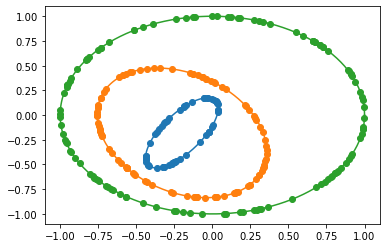

In [3]:
points_of_elipse_a = elipse_a.draw(400)
points_of_elipse_b = elipse_b.draw(400)
points_of_elipse_c = elipse_c.draw(400)

def get_random_points_from_array(array, count):
    return array[np.random.choice(len(array), count)]
def draw_single_points(points):
    transposed = np.transpose(points)
    plt.scatter(transposed[0], transposed[1])

random_points_of_elipse_a = get_random_points_from_array(points_of_elipse_a, 60)
random_points_of_elipse_b = get_random_points_from_array(points_of_elipse_b, 100)
random_points_of_elipse_c = get_random_points_from_array(points_of_elipse_c, 120)

draw_single_points(random_points_of_elipse_a)
draw_single_points(random_points_of_elipse_b)
draw_single_points(random_points_of_elipse_c)
plt.show()

#### Задание 1

In [4]:
features_a = random_points_of_elipse_a
labels_a = np.full((len(features_a),), 0)
features_b = random_points_of_elipse_b
labels_b = np.full((len(features_b),), 1)
features_c = random_points_of_elipse_c
labels_c = np.full((len(features_c),), 2)

features_a_train, features_a_test, labels_a_train, labels_a_test = \
train_test_split(features_a, labels_a, test_size=0.2)
features_b_train, features_b_test, labels_b_train, labels_b_test = \
train_test_split(features_b, labels_b, test_size=0.2)
features_c_train, features_c_test, labels_c_train, labels_c_test = \
train_test_split(features_c, labels_c, test_size=0.2)

print(len(features_a_train))
print(len(features_b_train))
print(len(features_c_train))

48
80
96


In [5]:
features_train = np.concatenate((features_a_train, features_b_train, features_c_train))
labels_train = np.concatenate((labels_a_train, labels_b_train, labels_c_train))
features_test = np.concatenate((features_a_test, features_b_test, features_c_test))
labels_test = np.concatenate((labels_a_test, labels_b_test, labels_c_test))

print(len(features_train))
print(len(labels_train))
print(len(features_test))
print(len(labels_test))

224
224
56
56


In [6]:
spread = 0.3
pnn = PNN(std=spread)
pnn.fit(features_train, labels_train)
predicted = pnn.predict(features_test)
print(predicted)
print(labels_test)
print(f"Score: {np.mean(predicted == labels_test)}")

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 2 2 1 2
 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Score: 0.875


In [7]:
def get_grid(left, right, bottom, top, step):
     x = np.arange(left, right, step)
     y = np.arange(bottom, top, step)
     xx,yy = np.meshgrid(x,y)
     return np.array((xx.ravel(), yy.ravel())).T
    
grid = get_grid(-1.2, 1.2, -1.2, 1.2, 0.07)
print(grid)

[[-1.2  -1.2 ]
 [-1.13 -1.2 ]
 [-1.06 -1.2 ]
 ...
 [ 1.04  1.18]
 [ 1.11  1.18]
 [ 1.18  1.18]]


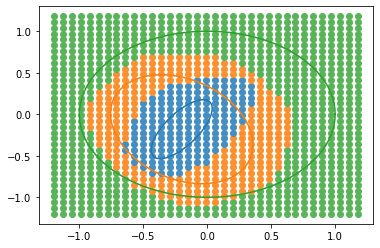

In [8]:
classes=pnn.predict(grid)
elipse_a.draw(100)
elipse_b.draw(100)
elipse_c.draw(100)

def draw_by_classes(points, classes, colors):
    for point, clas in zip(points, classes):
        plt.scatter(point[0], point[1], color=colors[clas])

draw_by_classes(grid, classes, ['#458EC1', '#FF902F', '#59B459'])

#### Задание 2

In [9]:
rbf = RBF(length_scale = spread)
gpc = GaussianProcessClassifier(kernel=rbf)
gpc.fit(features_train, labels_train)
predicted_gpc = gpc.predict(features_test)
print(f"Score: {np.mean(predicted_gpc == labels_test)}")

Score: 1.0


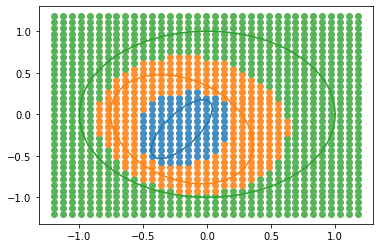

In [10]:
classes_rbf=gpc.predict(grid)
elipse_a.draw(100)
elipse_b.draw(100)
elipse_c.draw(100)
draw_by_classes(grid, classes_rbf, ['#458EC1', '#FF902F', '#59B459'])

Score: 1.0


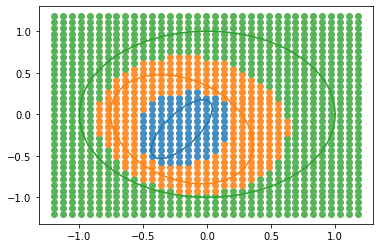

In [11]:
rbf2 = RBF(length_scale = 0.1)
gpc2 = GaussianProcessClassifier(kernel=rbf2)
gpc2.fit(features_train, labels_train)
predicted_gpc2 = gpc2.predict(features_test)
print(f"Score: {np.mean(predicted_gpc2 == labels_test)}")
classes_rbf2=gpc2.predict(grid)
elipse_a.draw(100)
elipse_b.draw(100)
elipse_c.draw(100)
draw_by_classes(grid, classes_rbf2, ['#458EC1', '#FF902F', '#59B459'])

#### Задание 3

In [12]:
function = lambda t : np.cos(np.square(t))
interval, step = (0.0, 4.0), 0.02

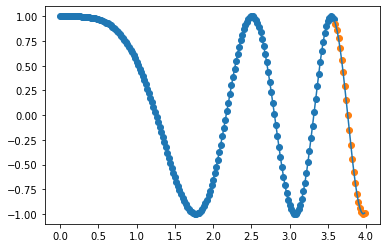

In [13]:
features_graph = np.arange(interval[0], interval[1], step)
labels_graph = function(features_graph)
plt.plot(features_graph, labels_graph)
split_index = int(len(features_graph)*0.9)
graph_features_train, graph_features_test, graph_labels_train, graph_labels_test = \
features_graph[:split_index], features_graph[split_index:], labels_graph[:split_index], labels_graph[split_index:]
plt.scatter(graph_features_train, graph_labels_train)
plt.scatter(graph_features_test, graph_labels_test)

Score: 1.7166825776246482


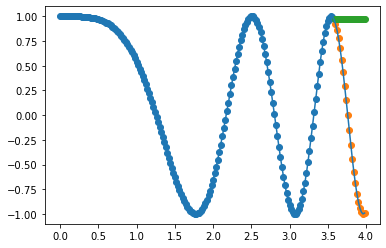

In [14]:
grnn = GRNN(std=0.02)
grnn.fit(graph_features_train, graph_labels_train)
predicted_grnn = grnn.predict(graph_features_test)
print(f"Score: {mse(predicted_grnn, graph_labels_test)}")
plt.plot(features_graph, labels_graph)
plt.scatter(graph_features_train, graph_labels_train)
plt.scatter(graph_features_test, graph_labels_test)
plt.scatter(graph_features_test, predicted_grnn)

Score: 2.6353274727249714e-06


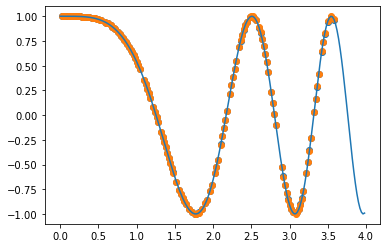

In [21]:
gf_features_train, gf_features_test, gf_labels_train, gf_labels_test = \
train_test_split(graph_features_train, graph_labels_train, test_size=0.2)
grnn2 = GRNN(std=step)
grnn2.fit(features_graph, labels_graph)
predicted_grnn2 = grnn2.predict(gf_features_train)
print(f"Score: {mse(np.reshape(predicted_grnn2, (len(predicted_grnn2),)), gf_labels_train)}")

plt.plot(features_graph, labels_graph)
plt.scatter(gf_features_train, predicted_grnn2)
plt.scatter(gf_features_train, gf_labels_train)

### Вывод

В 4ой лабораторной работе удалось построить сразу несколько занимательных нейронных сетей – вероятностную нейронную сеть, радиально-базисную нейронную сеть и обобщенно-регрессионную нейронную сеть. 

Вероятностная нейронная сеть применяется для решения задач классификации. В отличие от задач кластеризации, где классы, на которые необходимо разбить множество данных, не заданы, в задаче классификации указано количество классов, к которому может быть отнесен каждый пример, и задано обучающее множество – для каждого обучающего набора определён класс, к которому он относится. Вероятностная сеть для каждого входного вектора определяет вероятности, с которыми этот вектор принадлежит каждому классу.

Сеть радиальных базисных функций обычно используются для задач аппроксимации. Эта сеть обладает высокой скоростью обучения. Архитектура такая же как и у сети прямого распространения (см. рисунок выше), но основное различие состоит в том, что RBFN использует радиально-базовую функцию в качестве функции активации, а число нейронов равно числу точек в обучающем множестве, ее выгодно использовать когда обучающее множество не велико.

Обобщенно-регрессионная нейронная сеть (GRNN) устроена аналогично вероятностной нейронной сети (PNN), но она предназначена для решения задач регрессии
